In [223]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from time import perf_counter

Decision Tree Classifier

In [224]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
X = df.drop('y', axis=1)
y = LabelEncoder().fit_transform(df['y'])

In [225]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [226]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [227]:
column_transform = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [228]:
df = df.merge(column_transform)
df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'day_of_week'], axis = 1, inplace=True)
df.y = LabelEncoder().fit_transform(df.y)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [229]:
X = df.drop(['y'], axis=1)
y = df.y

In [230]:
t_1 = perf_counter()

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [232]:
clf = DecisionTreeClassifier(random_state=42, max_depth=7)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [233]:
t_2 = perf_counter()

In [234]:
print(f"Time taken for the training the Decision Tree Model:\n\n", t_2 - t_1)
print(f"Classification Report(Decision Tree Classifier):\n\n", classification_report(y_test, y_pred))

Time taken for the training the Decision Tree Model:

 0.31299140000010084
Classification Report(Naive Bayes Classifer):

               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7436
           1       0.67      0.54      0.59       872

    accuracy                           0.92      8308
   macro avg       0.81      0.75      0.78      8308
weighted avg       0.92      0.92      0.92      8308



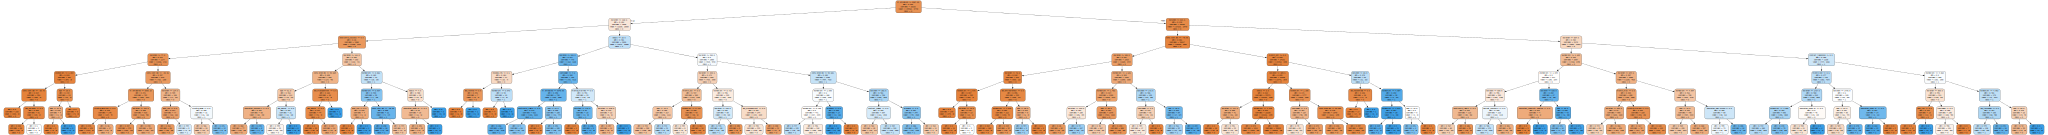

In [235]:
feature_cols = X.columns
d = export_graphviz(clf, out_file = None, feature_names=feature_cols, class_names=['0','1'] , rounded=True, filled=True)

graphviz.Source(d)

Naive Bayes Classifier

In [236]:
t_1 = perf_counter()

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [238]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [239]:
t_2 = perf_counter()

In [240]:
print(f"Time taken for Naive Bayes Model:\n\n", t_2 - t_1)
print(f"Classification Report(Naive Bayes Classifer):\n\n", classification_report(y_test, y_pred))

Time taken for Naive Bayes Model:

 0.31150960000013583
Classification Report(Naive Bayes Classifer):

               precision    recall  f1-score   support

           0       0.93      0.91      0.92     11007
           1       0.44      0.51      0.48      1455

    accuracy                           0.87     12462
   macro avg       0.69      0.71      0.70     12462
weighted avg       0.88      0.87      0.87     12462

